In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
from tabulate import tabulate
from scipy.linalg import sqrtm
import time    
import seaborn as sns
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, anim_matrix_histogram,
                   anim_fock_distribution)

In [117]:
from quadpy4 import Quadpy as qp

In [9]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('font', size=8)          # controls default text sizes
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

## Jaynes Cummins Model

We will consider the time evolution of two bosons interacting via the coupling of their positions

\begin{align*}
H= & \omega_{1}\hat{a}_{1}^{\dagger}\hat{a}_{1}+\omega_{2}\hat{a}_{2}^{\dagger}\hat{a}_{2}+g\left(\hat{a}_{1}^{\dagger}+\hat{a}_{1}\right)\left(\hat{a}_{2}^{\dagger}+\hat{a}_{2}\right)\\
= & \omega_{1}\hat{a}_{1}^{\dagger}\hat{a}_{1}+\omega_{2}\hat{a}_{2}^{\dagger}\hat{a}_{2}+g\left(\hat{a}_{1}^{\dagger}\hat{a}_{2}^{\dagger}+\hat{a}_{1}\hat{a}_{2}^{\dagger}+\hat{a}_{1}^{\dagger}\hat{a}_{2}+\hat{a}_{1}\hat{a}_{2}\right)\\
= & \frac{\omega_{1}}{2}\left(\hat{a}_{1}^{\dagger}\hat{a}_{1}+\hat{a}_{1}\hat{a}_{1}^{\dagger}\right)+\frac{\omega_{2}}{2}\left(\hat{a}_{2}^{\dagger}\hat{a}_{2}+\hat{a}_{2}\hat{a}_{2}^{\dagger}\right)\\
 & +\frac{g}{2}\left(\hat{a}_{1}^{\dagger}\hat{a}_{2}^{\dagger}+\hat{a}_{2}^{\dagger}\hat{a}_{1}^{\dagger}+\hat{a}_{1}\hat{a}_{2}^{\dagger}+\hat{a}_{2}^{\dagger}\hat{a}_{1}+\hat{a}_{1}^{\dagger}\hat{a}_{2}+\hat{a}_{2}\hat{a}_{1}^{\dagger}+\hat{a}_{1}\hat{a}_{2}+\hat{a}_{2}\hat{a}_{1}\right)\\
= & \hat{a}_{1}^{\dagger}\left(\frac{\omega_{1}}{2}\hat{a}_{1}+\frac{g}{2}\hat{a}_{2}+\frac{g}{2}\hat{a}_{2}^{\dagger}\right)+\hat{a}_{2}^{\dagger}\left(\frac{g}{2}\hat{a}_{1}+\frac{\omega_{2}}{2}\hat{a}_{2}+\frac{g}{2}\hat{a}_{1}^{\dagger}\right)\\
 & +\hat{a}_{1}\left(\frac{g}{2}\hat{a}_{2}+\frac{\omega_{1}}{2}\hat{a}_{1}^{\dagger}+\frac{g}{2}\hat{a}_{2}^{\dagger}\right)+\hat{a}_{2}\left(\frac{g}{2}\hat{a}_{1}+\frac{g}{2}\hat{a}_{1}^{\dagger}+\frac{\omega_{2}}{2}\hat{a}_{2}^{\dagger}\right)\\
= & \frac{1}{2}\left[\begin{array}{cccc}
\hat{a}_{1}^{\dagger} & \hat{a}_{2}^{\dagger} & \hat{a}_{1} & \hat{a}_{2}\end{array}\right]\left[\begin{array}{cccc}
\omega_{1} & g & 0 & g\\
g & \omega_{2} & g & 0\\
0 & g & \omega_{1} & g\\
g & 0 & g & \omega_{2}
\end{array}\right]\left[\begin{array}{c}
\hat{a}_{1}\\
\hat{a}_{2}\\
\hat{a}_{1}^{\dagger}\\
\hat{a}_{2}^{\dagger}
\end{array}\right]\\
= & \sum_{i,j=1}^{4}h_{ij}\eta_{i}^{\dagger}\eta_{j}
\end{align*}

where $h_{ij}$ is an element of the $2N_{b}\times2N_{b}$ matrix
containing the coefficients and $\eta_{i}$ refers to $i^{th}$ element
of the column vector $\boldsymbol{\eta}=\left[\begin{array}{cccc}
\hat{a}_{1} & \hat{a}_{2} & \hat{a}_{1}^{\dagger} & \hat{a}_{2}^{\dagger}\end{array}\right]^{T}$ formed by the creation and annihilation operators of the system.
Thus, we can write the hamiltonian as

\begin{align*}
H & =\frac{1}{2}\boldsymbol{\eta}^{\dagger}h\boldsymbol{\eta}
\end{align*}

where the coefficient matrix $h$ can be written as

\begin{align*}
h & =\left[\begin{array}{cc}
H_{S} & K\\
K & H_{S}
\end{array}\right]
\end{align*}

where 
\begin{align*}
H_{S}= & \left[\begin{array}{cc}
\omega_{1} & g\\
g & \omega_{2}
\end{array}\right] &  & \text{and}\hspace{1em} & K= & \left[\begin{array}{cc}
\omega_{1} & g\\
g & \omega_{2}
\end{array}\right]
\end{align*}




Below, we construct the hamiltonian matrix ```h``` for the Jaynes-Cummins Hamiltonian and print the matrix using the ``` qp.PrintMatrix(h) ``` function.

In [11]:
ω1 = 1
ω2 = 1
g = 0.001
HS = np.array([[ω1,g],[g,ω2]])
K = np.array([[0,g],[g,0]])
h = np.concatenate((np.concatenate((HS,K)),np.concatenate((K,HS))),axis=1)

qp.PrintMatrix(h)

----------  ----------  ----------  ----------
(1+0j)      (0.001+0j)  0j          (0.001+0j)
(0.001+0j)  (1+0j)      (0.001+0j)  0j
0j          (0.001+0j)  (1+0j)      (0.001+0j)
(0.001+0j)  0j          (0.001+0j)  (1+0j)
----------  ----------  ----------  ----------


## Determination of normal modes
$$
\begin{eqnarray}
\bar{h}=h^{\frac{1}{2}}\Omega h^{\frac{1}{2}}, &\hspace{5mm}  & \Omega=\left(\begin{array}{cc}
\mathbb{I} & 0\\
0 & -\mathbb{I}
\end{array}\right)
\end{eqnarray}
$$

$\bar{h}$ is diagonalised by $U_D$ such that

$$
U_D\bar{h}U_D^{\dagger}=D\bigoplus-D
$$



The matrix of the eigenvectors $U_D$ and the eigenvalues of $\bar{h}$ can be obtained in the desired direct sum form of $D \bigoplus -D$ using the function ``` qp.U_D(h) ``` where the input is the hamiltonian matrix ``` h ```

In [12]:
U, D = qp.U_D(h)

qp.PrintList(D,n=6)

--------------
(0.998999+0j)
(1.001+0j)
(-0.998999+0j)
(-1.001+0j)
--------------


Using the $U$ and $D$ obtained from this diagonalisation, the bosonic Bogoliubov transformation is obtained as
$$
T=\left(D^{-\frac{1}{2}}\bigoplus D^{-\frac{1}{2}}\right)Uh^{\frac{1}{2}}
$$
thus taking $\left(D\bigoplus D\right)=\Lambda$, our coefficient
matrix can be written as 
$$
h=T^{\dagger}\Lambda T
$$

Thus the hamilton matrix $h$ is diagonalised by the inverse Bogoliubov transformation $A=T^{-1}$ and it's hermitian conjugate 

$$
\Lambda = A^{\dagger}hA
$$

In terms of the transformation $T$, the hamiltonian can be written as
$$H_{C}=\frac{1}{2}\boldsymbol{\eta}^{\dagger}T^{\dagger}\Lambda T\boldsymbol{\eta}-\frac{1}{2}Tr\left[H_{S}\right]$$


Defining new bosonic variables as $\boldsymbol{\zeta}=T \boldsymbol{\eta}$, we have:
$$
\mathcal{H}=\frac{1}{2}\boldsymbol{\zeta}^{\dagger}\Lambda\boldsymbol{\zeta}-\frac{1}{2}Tr\left[H_{S}\right]
$$


The Bogoliubov transformation $T$ along with $U$ and $\Lambda$ can be obtained from the ``` qp.Bogoliubov_Transform(h) ```, where ``` h ``` is the hamiltonian matrix for the coupled system. The inverse of the bogoliubov transform can be obtained using numpy.

In [16]:
T, U, λ = qp.Bogoliubov_Transform(h)

A = np.linalg.inv(T)
Adag = np.transpose(np.conjugate(A))
qp.PrintMatrix(Adag @ h.real @ A,n=5)

----------  ----------  ----------  ----------
(0.999+0j)  0j          0j          0j
0j          (1.001+0j)  0j          0j
0j          0j          (0.999+0j)  0j
0j          0j          0j          (1.001+0j)
----------  ----------  ----------  ----------


Using the inverse of the bogoliubov transformation $A=T^{-1}$, we can write $\eta = A\zeta$, an equality which holds at all times. It can be shown that this gives us

$$
\langle \boldsymbol{\eta}^{\dagger} \boldsymbol{\eta} (t)\rangle = A^{*}\langle \boldsymbol{\zeta}^{\dagger} \boldsymbol{\zeta} (t) \rangle A^T 
$$

where $\langle \boldsymbol{\eta}^{\dagger} \boldsymbol{\eta} (0)\rangle$ represents the matrix containing the two-point correlators of the original bosonic operators $\eta_i$, ie $\langle \boldsymbol{\eta}^{\dagger} \boldsymbol{\eta}\rangle_{ij} = \langle {\eta}^{\dagger}_i {\eta}_j\rangle$. For the Jayne Cummins system, the matrix of correlators is given by


\begin{align*}
\left\langle \boldsymbol{\eta^{\dagger}\eta}\right\rangle  & =\left\langle \left(\boldsymbol{\eta^{\dagger}}\right)^{T}\boldsymbol{\eta}^{T}\right\rangle =\left[\begin{array}{cccc}
\left\langle a_{1}^{\dagger}a_{1}\right\rangle  & \left\langle a_{1}^{\dagger}a_{2}\right\rangle  & \left\langle a_{1}^{\dagger}a_{1}^{\dagger}\right\rangle  & \left\langle a_{1}^{\dagger}a_{2}^{\dagger}\right\rangle \\
\left\langle a_{2}^{\dagger}a_{1}\right\rangle  & \left\langle a_{2}^{\dagger}a_{2}\right\rangle  & \left\langle a_{2}^{\dagger}a_{1}^{\dagger}\right\rangle  & \left\langle a_{2}^{\dagger}a_{2}^{\dagger}\right\rangle \\
\left\langle a_{1}a_{1}\right\rangle  & \left\langle a_{1}a_{2}\right\rangle  & \left\langle a_{1}a_{1}^{\dagger}\right\rangle  & \left\langle a_{1}a_{2}^{\dagger}\right\rangle \\
\left\langle a_{2}a_{1}\right\rangle  & \left\langle a_{2}a_{2}\right\rangle  & \left\langle a_{2}a_{1}^{\dagger}\right\rangle  & \left\langle a_{2}a_{2}^{\dagger}\right\rangle 
\end{array}\right]
\end{align*}


This matrix can be created using the function ``` qp.Init_Corr(n, psi) ``` where ```n``` is the number of bosons and ```psi``` is the composite intial state expressed as tensor product using functions from ```qutip```.  

In [32]:
N = 100
ψ1 = (1/np.sqrt(1)) * (tensor(fock(N,1),fock(N,0)))

Ad_A0 = qp.Init_Corr(2, ψ1)

print(Ad_A0)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


The above equation in the previous cell, at $t=0$ allows us to obtain the inital correlators of the transformed operators from the initial correlators of the system operators in the original frame using the Bogoliubov transformation matrix $T$. The matrix of the transformed correlator is obtained using the function ``` qp.Zetad_Zeta_Matrix(T,Ad_A0) ```, where ``` T ``` is the bogoliubov transformation matrix and ```Ad_A0``` is the matrix of the initial correlators of the original frame.

In [18]:
zeta_d_zeta = qp.Zetad_Zeta_Matrix(T,Ad_A0)

The evolution of the normal mode correlations $\langle \boldsymbol{\zeta}^{\dagger} \boldsymbol{\zeta} (t) \rangle$ can be obtained as the evolution of the $\zeta_i$ operators is given by $\zeta_{i}\left(t\right)=e^{-i\lambda_{i}}\zeta_{i}\left(0\right)$. The evolution of the $\boldsymbol{\eta}$ correlators, can therefore be written down in terms of the evolved correlations in the transformed basis. For the correlator $\langle {\eta}^{\dagger}_p {\eta}_q\rangle$ that we are interested in, we put in the values of ```p``` and ```q``` in the function ```qp.mod_zeta_corr(A,zeta_d_zeta,p-1,q-1)```, where ```A``` is the inverse Bogoliubov matrix and ```zeta_d_zeta``` is the matrix of the initial correlators in the transformed frame. The ```qp.mod_zeta_corr()``` function gives us a modified set of the $\boldsymbol{\zeta}$ correlators with weights depending on ```A``` and ```p,q```, which can be used to find the evolution of the original correlator $\langle {\eta}^{\dagger}_p {\eta}_q\rangle$ using the ```qp.Evolve(λ,modified_Zeta_Corr,t_max,del_t)``` function. The input parameters of the ```qp.Evolve()``` function are the eigenvalues of ```h``` and the modified correlations in  $\boldsymbol{\zeta}$ frame along with the ```t_max``` and ```del_t``` which specify the final time and the discreteness.

In [19]:
p = 1
q = 1
modified_Zeta_Corr = qp.mod_zeta_corr(A,zeta_d_zeta,p-1,q-1)

initial_val_error = np.abs(Ad_A0[p-1][q-1] - qp.Eta_correlation_t(λ,modified_Zeta_Corr,0))

if initial_val_error > 1.e-13:
    print('Initial Value error: ',initial_val_error)

Ω = 2 * g
t_max = 5 * (2*np.pi/Ω)
dt = 0.1     

T_1,Plots_g1 = qp.Evolve(λ,modified_Zeta_Corr,t_max,del_t = dt)

Text(0.5, 0, '$\\Omega t/2 \\pi$')

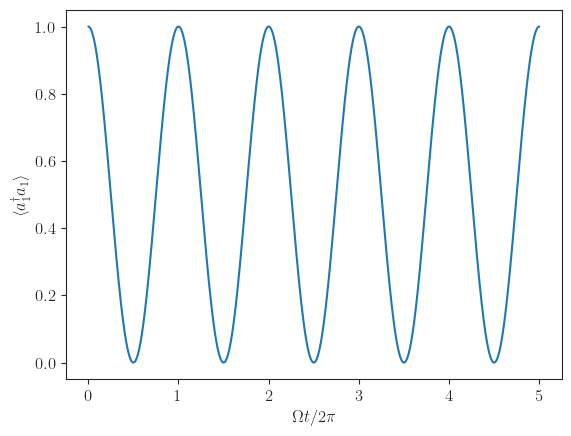

In [20]:
plt.plot(T_1/(2*np.pi/Ω),Plots_g1.real)
plt.ylabel(r'$\langle a^{\dagger}_1 a_1 \rangle$')
plt.xlabel(r'$\Omega t/2 \pi$')

The time evolution of $\langle {\eta}^{\dagger}_p {\eta}_q\rangle$ an also be obtained directly from the hamiltonian matrix ```h``` and the matrix o the initial correlators ```Ad_A0``` using the function ```qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt)```

In [21]:
ω1 = 100
ω2 = 100
g = 5
HS = np.array([[ω1,g],[g,ω2]])
K = np.array([[0,g],[g,0]])
h = np.concatenate((np.concatenate((HS,K)),np.concatenate((K,HS))),axis=1)

N = 100
ψ1 = (1/np.sqrt(1)) * (tensor(fock(N,0),fock(N,1)))

Ad_A0 = qp.Init_Corr(2, ψ1)

Ω = 2 * g
t_max = 5 * (2*np.pi/Ω)

T, Data = qp.TimeEvolution(h,Ad_A0,1,1,t_max,dt=0.01)

Text(0.5, 0, '$\\Omega t/2 \\pi$')

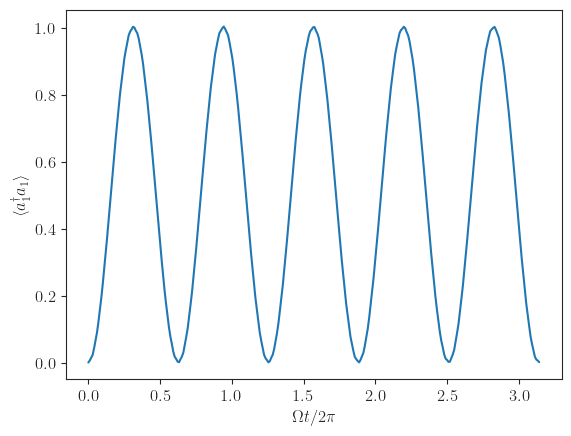

In [80]:

plt.plot(T,Data.real)
plt.ylabel(r'$\langle a^{\dagger}_1 a_1 \rangle$')
plt.xlabel(r'$\Omega t/2 \pi$')

## Interaction of ocsillator dipoles with Photonic Reservoirs

The function ```qp.TimeEvolution()``` can be used to find the time evolution for any gaussian system with the hamiltonian expressed in terms of the hamilton matrix ``h`` and for given values of the initial correlators. In this notebook, we will explore the quadpy functions to simulate dynamics of light-matter interaction with electromagnetic baths inside two types of reservoirs. First we will consider the 1-D multimode cavity of length ``L`` containing oscillator dipoles, with the $i^{th}$ dipole placed at locations ``xS[i]`` and having frequency ``ωS[i]``. The hamiltonian for this system is given by

\begin{align*}
H= & H_{\text{System}}+H_{\text{Cavity}}+H_{\text{Interaction}}\\
H_{\text{System}}= & \sum_{i=1}^{N_{d}}\omega_{i}^{s}a_{i}^{\dagger}a_{i}\\
H_{\text{Cavity}}= & \sum_{i=1}^{N_{b}}\omega_{i}^{R}R_{i}^{\dagger}R_{i}\\
H_{\text{Interaction}}= & \boldsymbol{d}\cdot\boldsymbol{E}
\end{align*}

where $\textbf{d}$ and $\textbf{E}$ represent the dipole moment of the oscillator dipoles and the Electric field of the cavity modes. The hamilton matrix for this system can be generated using the function ``qp.CavityHamiltonian(L,ωS,xS,N_bath,g)``, where 
-   ``L`` is the length of the cavity.  
-  ``ωS,xS`` are the lists containing the frequencies and the positions of the dipole oscillators inside the cavity.
-   ``N_bath`` refers to the number of bath modes we want to include within the calculation.
-   ``g`` is the bare coupling strength inside between the light and matter


### Single Dipole in a Cavity

Let us the consider a single dipole of frequency $\omega_S$ within a cavity of length $L$. `qp.CavityHamiltonian(L,ωS,xS,N_bath,g)` generates the hamilton properties. The following properties of the hamiltonian may also be controlled by the kwargs of the `qp.CavityHamiltonian(L,ωS,xS,N_bath,g)` function 

- `RWA_Switch=0` implies the RWA is not applied to to the hamiltonian. Passing a value of `RWA_Switch=1` removes the counter rotating terms in the hamiltonian
- `Broadband=0` implies the broadband approximation is not applied to the hamiltonian
- `gauge='d.E'` implies that the returned hamilton matrix is in the quantum optics dipole interaction gauge. We may also choose
    - `gauge='coulomb'` for the minimal coupling hamiltonian containing the diagmagnetic or the bath self interaction term
    - `gauge='dipole'` for the Power-Zienau-Wooley transformed version of the coulomb gauge hamiltonian containg a dipole self teraction term.
- `mode_func='sinkx'` implies that the mode functions corresponding to the cavity modes are all sines. This implies that the cavity is extended from $x=0$ to $x=L$. Passing `mode_func='sinkx+coskx'` gives us the hamiltonian of cavity that is extended from $x=-L/2$ to $x=+L/2$

In [48]:
L = 40 * np.pi
ωS = [2.5]
xS = [L/2]
N_bath = 200
g = 0.025

h = qp.CavityHamiltonian(L,ωS,xS,N_bath,g)#,RWA_Switch=0,Broadband=0,gauge='d.E',mode_func='sinkx')

Having generated the hamilton matrix `h`, we now require the matrix of the initial correlators. While we can still use  `qp.InitCorr` to generate the matrix from any initial state we want, it is cumbersome to define the state using `QuTiP` as the state is a tensor product over all the bath and system modes. For this reason, we will use the function `qp.CavityInitCorr(N_bath,L,cavity_state='vacuum',dipole_state='fock',N_d=1)` to generate the matrix of the inital correlators. The passed arguments are:
- `N_bath` is the number of bath modes included in the hamiltonian
- `L` is the length of the cavity
- `cavity_state='vacuum'` initialises the cavity modes in a vacuum. Passing `cavity_state='thermal'` also allows us to initialise the cavity in a thermal state at a particular temperature.
- `dipole_state='fock'` initialises the dipoles in fock states with equal population. This can be changed to `dipole_state='coherent'` to initialise the dipole oscillators in coherent states with equal population.
- `N_d=1` is the number of dipoles
- `pop=1` is the initial population in each dipole
- `phase=None` is the list containing the initial phases of the dipoles in case they are in coherent states. When `phase=None`, all the dipoles are initialised with the same phase.
- `Beta=200` is the temperature of the cavity in case it is initialised in a thermal state

In [35]:
Ad_A0 = qp.CavityInitCorr(N_bath,L,cavity_state='vacuum',dipole_state='fock',N_d=1)#,pop=1,phase=None,Beta=200)

Now that we have the hamilton matrix `h` and the matrix of initial correlators `Ad_A0`, we can calculate the time evolution of the system dipoles population using `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` by setting p=q=1

Text(0.5, 0, '$ct/L $')

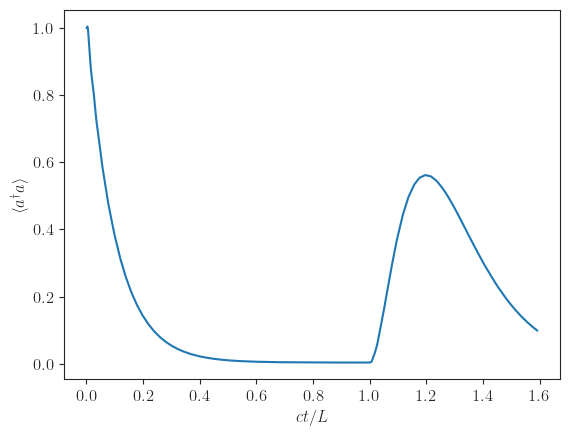

In [36]:
t_max = 200

T, Data = qp.TimeEvolution(h,Ad_A0,1,1,t_max,dt=0.01)

plt.plot(T/L,Data.real)
plt.ylabel(r'$\langle a^{\dagger} a \rangle$')
plt.xlabel(r'$ct/L $')

We can see from the dynamics that population of the system dipole, which was initialised in a fock state with population equal to one, decays exponentially to zero and remains in the ground state until $t=L/c$, when we see a re-excitation of the system dipole. This re-excitation is known as a Poincare recurrence, which occurs due to the reflection of the emitted radiation from the cavity mirrors.   

### Two Dipoles

Now, we will consider the case of two dipoles within the cavity separated by their wavelength placed symmetrically about the center of the cavity. To generate this hamiltonian, we will again use the  `qp.CavityHamiltonian(L,ωS,xS,N_bath,g)` function. For two dipoles the arguments  `ωS,xS` will be lists with two elements specifying the frequencies and postions of the two dipoles respectively.

In [50]:
L = 40 * np.pi
ωS = [2.5,2.5]
λS = 2*np.pi/ωS[0]
Δx = λS
xS = [L/2-Δx/2,L/2+Δx/2]
N_bath = 200
g = 0.025

h = qp.CavityHamiltonian(L,ωS,xS,N_bath,g,RWA_Switch=0,Broadband=0,gauge='d.E',mode_func='sinkx')

Although `qp.CavityInitCorr()` allows us to obtain the initial correlators easily when the dipoles are initialised as product states of fock or coherent states, we want to initialise the dipoles in the following entangled state.

\begin{align*}
\left|\psi\right\rangle _{\text{System}}= & \frac{1}{\sqrt{2}}\left(\left|10\right\rangle - \left|01\right\rangle \right)
\end{align*}

To do this, we will first express this state as a quantum object using QuTiP and find the Initial Correlation matrix for just the system dipoles using the `qp.InitCorr(n, psi)`, where `n` is the number of dipoles and `psi` is the composite state of the two dipoles. The returned matrix `ad_a0` is then laced with the initial correlations of the cavity using the function `qp.CavityInitLace(ad_a0,N_bath,L,cavity_state='vacuum')` to get the inital correlation matrix of the total hamiltonian. Here the argument `ad_a0` is the matrix of the initial correlators of the system and the other arguments are similar to `qp.CavityInitCorr()`. 


In [51]:
N = 100
ψ1 = (1/np.sqrt(2)) * (tensor(fock(N,1),fock(N,0)) - tensor(fock(N,0),fock(N,1))) 

ad_a0 = qp.Init_Corr(2, ψ1)

Ad_A0 = qp.CavityInitLace(ad_a0,N_bath,L,cavity_state='vacuum')#,Beta=200)
print(Ad_A0)

[[ 0.5+0.j -0.5+0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0.5+0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 ...
 [ 0. +0.j  0. +0.j  0. +0.j ...  1. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  1. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  1. +0.j]]


Now that we have the hamilton matrix `h` and the matrix of initial correlators `Ad_A0`, we can calculate the time evolution of the system dipoles population using `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` by setting p=q=1

(0.0, 1.5915494309189535)

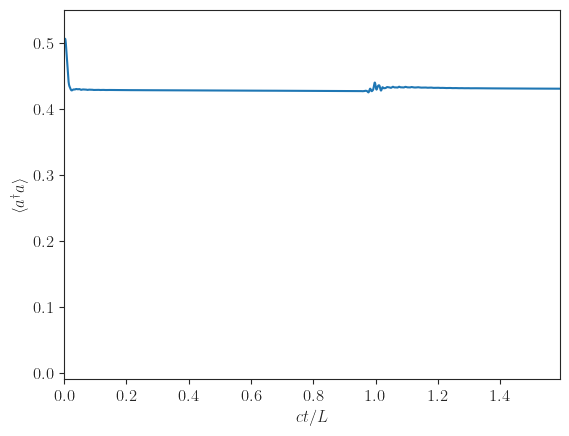

In [54]:
t_max = 200

T, Data = qp.TimeEvolution(h,Ad_A0,1,1,t_max,dt=0.01)

plt.plot(T/L,Data.real)

plt.ylabel(r'$\langle a_1^{\dagger} a_1 \rangle$')
plt.xlabel(r'$ct/L $')
plt.ylim(-0.01,0.55)
plt.xlim(0.00,200/L)


We see that the dipoles are collectively in a 'subradiant' state where the excitation is trapped between them. This prevents their population from decaying out.

### Ten Dipoles

Now, we will consider the case of ten dipoles within the cavity separated by $\Delta x = \lambda_S/10$ placed symmetrically about the center of the cavity. To generate this hamiltonian, we will again use the  `qp.CavityHamiltonian(L,ωS,xS,N_bath,g)` function. For two dipoles the arguments  `ωS,xS` will be lists(or arrays) with ten elements each, specifying the frequencies and postions of the ten dipoles respectively.

In [56]:
L = 100 * np.pi
ωS = 2.5 * np.ones(10)
λS = 2*np.pi/2.5
Δx = λS/10
xS = []

for i in np.arange(-9/2,10/2,1):
    xS.append((L/2) + (i*Δx))

N_bath = 500
g = 0.01

h = qp.CavityHamiltonian(L,ωS,xS,N_bath,g,RWA_Switch=1,Broadband=1,gauge='d.E',mode_func='sinkx')

We initialise the dipoles in product coherent states and the cavity in the vacuum state using the `qp.CavityInitCorr(N_bath,L,cavity_state='vacuum',dipole_state='coherent',N_d=10)` function

In [57]:
Ad_A0 = qp.CavityInitCorr(N_bath,L,cavity_state='vacuum',dipole_state='coherent',N_d=10)#,pop=1,phase=None,Beta=200)

Now that we have the hamilton matrix `h` and the matrix of initial correlators `Ad_A0`, we can calculate the time evolution of the $i^{th}$ dipoles population using `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` by setting p=q=i. However, for the array of ten dipoles, it is easier to use the `qp.ArrayEvolve(h,Ad_A0,Nd,t_max,dt=0.01)`, which returns the dynamics of the collective populaton of the array as well as the individual population dynamics of the `Nd` number of dipoles inside the reservoir.

In [58]:
T, Collective, Data = qp.ArrayEvolve(h,Ad_A0,10,t_max,dt=0.01)

`qp.ArrayEvolve` returns the `Collective` population which is the sum of the population dynamics of the ten dipoles as well as the `Data`, which is a list containing the population dynamics of the dipoles individually

(0.0, 0.6366197723675814)

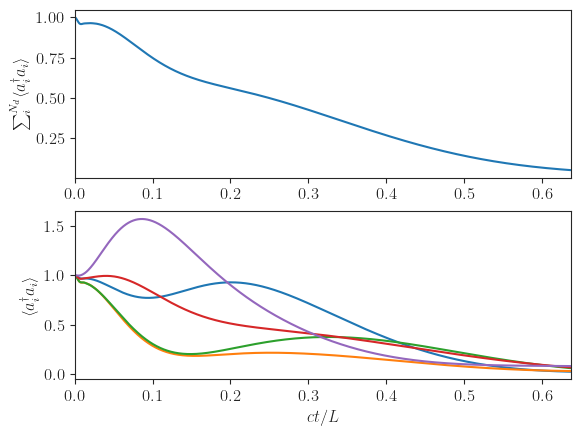

In [76]:

plt.subplot(211)
plt.plot(T/L,Collective.real/10)
plt.ylabel(r'$\sum_i^{N_d} \langle a_i^{\dagger} a_i \rangle$')
plt.xlim(0,200/L)

plt.subplot(212)
for i in range(5):
    plot_label = 'i='+str(i+1)
    plt.plot(T/L, Data[i].real, label=plot_label)
plt.ylabel(r'$\langle a_i^{\dagger} a_i \rangle$')
plt.xlabel(r'$ct/L $')
plt.xlim(0,200/L)

The collective radiation rate is given by 
\begin{align*}
I\left(t\right)= & -\frac{d}{dt}\sum_{i=1}^{N_{d}}\left\langle a_{i}^{\dagger}a_{i}\right\rangle \left(t\right)
\end{align*}

This quantity may also be calculated using `np.diff` and plotted in the following manner

(0.0, 0.6366197723675814)

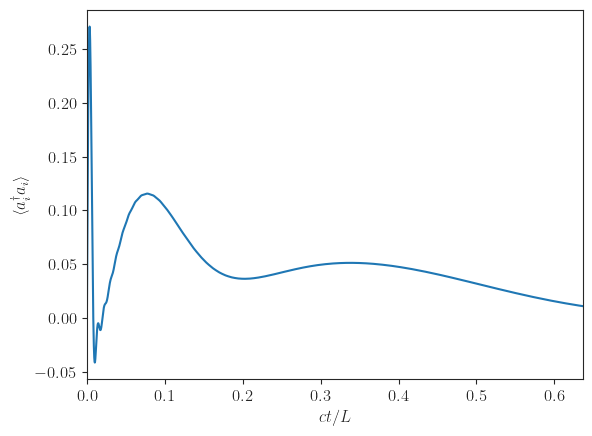

In [77]:
plt.plot(np.delete(T/L,-1),-np.diff(Collective)/0.01)
plt.ylabel(r'$\langle a_i^{\dagger} a_i \rangle$')
plt.xlabel(r'$ct/L $')
plt.xlim(0,200/L)

## Electric Field Intensity inside the cavity

Since, `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` allows us to find the time evolution of any two-point correlator of the hamiltonian, we can also compute the dynamics of the bath observables. For the cavity, the bath observable of interest is the Electric field intensity inside the cavity given by $$I\left(x\right)=:\epsilon_{0}E^{2}\left(x\right):
$$ where $E(r)$ is the electric field inside the cavity, given by

$$
E\left(r\right)=i\sum_{k=1}^{n}\mathscr{E}_{k}\left[R_{k}f_{k}\left(x\right)-R_{k}^{\dagger}f_{k}^{*}\left(x\right)\right]
$$

The Intensity distribution inside the cavity can be computed using the function `qp.CavityIntensity(ωS,N_bath,L,h,Ad_A0,t_vals,multi_mode=25)`  where
- `ωS` is the list containing the frequencies of the system dipoles
- `N_bath` is the number of the bath modes included in the hamiltonian
- `L` is the length of the cavity
- `h` is the hamilton matrix
- `Ad_A0` is the matrix of the initial correlators
- `t_vals` is the list containing the values of time at which the $I(r,t)$ is to be calculated
- `multi_mode` is a parameter that determines how many correlators will be included in the calculation for intensity. Increasing the value of the `multi_mode` parameter gives us a more accurate value of the intensity, but it leads to larger time required for computation.

### Single Dipole

Let us first consider the case of a dipole initially in a fock state with population one, placed in a cavity with vacuum. The hamilton matrix and the matrix of initial correlators can be obtained using the `qp.CavityHamiltonian` and `qp.CavityInitCorr` functions. 

In [78]:
L = 40 * np.pi
ωS = [2.5]
xS = [L/2]
N_bath = 200
g = 0.025

h = qp.CavityHamiltonian(L,ωS,xS,N_bath,g)#,RWA_Switch=0,Broadband=0,gauge='d.E',mode_func='sinkx')

Ad_A0 = qp.CavityInitCorr(N_bath,L,cavity_state='vacuum',dipole_state='fock',N_d=1)#,pop=1,phase=None,Beta=200)

In [64]:
t_vals = np.arange(0,100,5)
X, I = qp.CavityIntensity(ωS,N_bath,L,h,Ad_A0,t_vals,multi_mode=25)

The obtained intensity distribution `I` is a 2d list and can be plotted as function of position and time using a contour plot 

Text(0, 0.5, '$ct$')

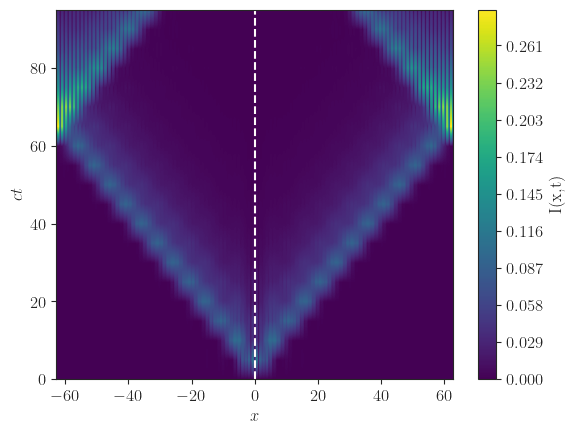

In [65]:
Cav_Int = I
x = X-L/2
y = t_vals 

X,Y = np.meshgrid(x,y)

Z = np.abs(np.array(Cav_Int))

clev = np.arange(Z.min(),Z.max(),0.001) #Adjust the .001 to get finer gradient

CS = plt.contourf(X, Y, Z, clev, cmap=plt.cm.viridis) 
plt.colorbar(label=r'I(x,t)')

plt.axvline(0,ls='--',color='snow')
plt.xlabel(r'$ x $')
plt.ylabel(r'$ct$')

### Two Dipoles

Let us now consider two dipoles at wavelength separation, initially in the entangled state  $\frac{1}{\sqrt{2}}\left(\left|10\right\rangle - \left|01\right\rangle \right)$, placed inside a cavity at vacuum.  The hamilton matrix and the matrix of initial correlators can be obtained using the `qp.CavityHamiltonian` and `qp.CavityInitCorr` functions.

In [66]:
L = 40 * np.pi
ωS = [2.5,2.5]
λS = 2*np.pi/2.5
Δx = λS
xS = [L/2-Δx/2,L/2+Δx/2]
N_bath = 200
g = 0.025

h = qp.CavityHamiltonian(L,ωS,xS,N_bath,g,RWA_Switch=1,Broadband=1,gauge='d.E',mode_func='sinkx')

N = 100
ψ1 = (1/np.sqrt(2)) * (tensor(fock(N,1),fock(N,0)) - tensor(fock(N,0),fock(N,1))) 

ad_a0 = qp.Init_Corr(2, ψ1)

Ad_A0 = qp.CavityInitLace(ad_a0,N_bath,L,cavity_state='vacuum')#,pop=1,phase=None,Beta=200)

print(np.shape(h))

In [68]:
t_vals = np.arange(0,105,5)
X, I = qp.CavityIntensity(ωS,N_bath,L,h,Ad_A0,t_vals,multi_mode=25)

Text(0, 0.5, '$ct$')

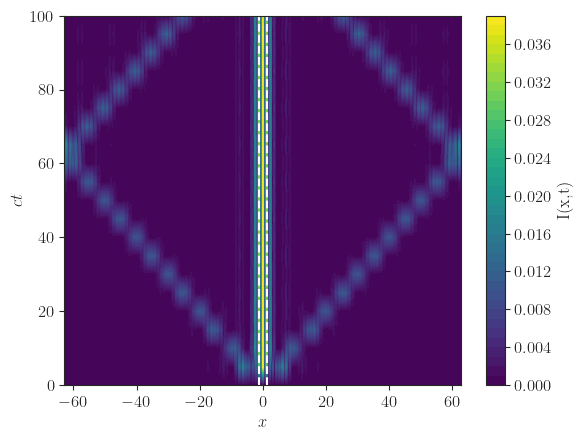

In [69]:
Cav_Int = I
x = X-L/2
y = t_vals

X,Y = np.meshgrid(x,y)

Z = np.abs(np.array(Cav_Int))

clev = np.arange(Z.min(),Z.max(),0.001) #Adjust the .001 to get finer gradient

CS = plt.contourf(X, Y, Z, clev, cmap=plt.cm.viridis) 
plt.colorbar(label=r'I(x,t)')
for i in range(len(ωS)):
    plt.axvline(xS[i]-L/2,ls='--',color='snow')
plt.xlabel(r'$ x $')
plt.ylabel(r'$ct$')

The obtained Intensity distribution shows that light is trapped between the locations of the two dipoles.

## Light Matter Interaction in a Coupled Cavity Array(CCA)

We can also simulate light matter interaction inside a coupled cavity array using quadpy functions. The hamiltonian for a coupled cavity array in $k$-space may be written as
\begin{align*}
H_{\text{CCA}} & =\sum_{i=1}^{N_{sites}}\omega_{k}R_{i}^{\dagger}R_{i}
\end{align*}
where,
\begin{align*}
\omega_{k}= & \omega_{C}-J\cos\left(ka\right), & k\in & \left(-\frac{\pi}{a},+\frac{\pi}{a}\right).
\end{align*}

Here $J$ is the hopping parameter between the sites of the cavity array, $\omega_C$ is the frequency of the individual cavity sites and $a$ is the separation between the sites. Similar to the cavity case, the total hamiltonian for light matter interaction of oscillator dipoles with the sites of the cavity array can be written as

$$ H= H_{\text{System}}+H_{\text{Cavity}}+H_{\text{Interaction}}$$

The hamilton matrix `h` for this total hamiltonian can be generated using the function `qp.CCAHamiltonian(ωS,xS,ωC,J,N_sites,g,RWA_Switch=0,Broadband=0,gauge='d.E')` , where

-  ``ωS,xS`` are the lists containing the frequencies and the positions of the dipole oscillators inside the cavity.
-  ``ωC`` is the frequency of the cavity sites of the CCA
-  `J` is the hopping parameter of the CCA
-   ``N_sites`` refers to the number of cavity sites in the CCA.
-  ``g`` is the bare coupling strength inside between the light and matter
-  `RWA_Switch=0` implies the RWA is not applied to to the hamiltonian. Passing a value of `RWA_Switch=1` removes the counter rotating terms in the hamiltonian
- `Broadband=0` implies the broadband approximation is not applied to the hamiltonian
- `gauge='d.E'` implies that the returned hamilton matrix is in the quantum optics dipole interaction gauge. We may also choose
    - `gauge='coulomb'` for the minimal coupling hamiltonian containing the diagmagnetic or the bath self interaction term
    - `gauge='dipole'` for the Power-Zienau-Wooley transformed version of the coulomb gauge hamiltonian containg a dipole self teraction term.



### Single Dipole

In [85]:
N_sites = 300
ωC = 2.5
J = 1.0
ωS = [2.5]
xS = [0]
g = 0.15/np.sqrt(N_sites)

h = qp.CCAHamiltonian(ωS,xS,ωC,J,N_sites,g,RWA_Switch=0,Broadband=0,gauge='d.E')

We will use the function `qp.CCAInitCorr(N_sites,ωC,J,cca_state='vacuum',dipole_state='fock',N_d=1)` to generate the matrix of the inital correlators. The passed arguments are:
-  ``N_sites`` refers to the number of cavity sites in the CCA.
-  ``ωC`` is the frequency of the cavity sites of the CCA
-  `J` is the hopping parameter of the CCA
- `cca_state='vacuum'` initialises the cavity modes in a vacuum. Passing `cavity_state='thermal'` also allows us to initialise the cavity in a thermal state at a particular temperature.
- `dipole_state='fock'` initialises the dipoles in fock states with equal population. This can be changed to `dipole_state='coherent'` to initialise the dipole oscillators in coherent states with equal population.
- `N_d=1` is the number of dipoles
- `pop=1` is the initial population in each dipole
- `phase=None` is the list containing the initial phases of the dipoles in case they are in coherent states. When `phase=None`, all the dipoles are initialised with the same phase.
- `Beta=200` is the temperature of the cavity in case it is initialised in a thermal state

In [89]:
Ad_A0 = qp.CCAInitCorr(N_sites,ωC,J,cca_state='vacuum',dipole_state='fock',N_d=1,Beta=0.1,pop=1,phase=None)

Now that we have the hamilton matrix `h` and the matrix of initial correlators `Ad_A0`, we can calculate the time evolution of the system dipoles population using `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` by setting p=q=1

In [97]:
t_max = 400

T, Data = qp.TimeEvolution(h,Ad_A0,1,1,t_max,dt=0.01)

Text(0.5, 0, '$Jt/N_{\\rm{sites}} $')

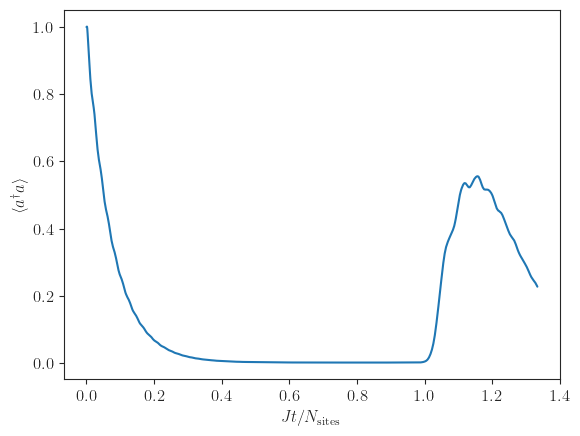

In [96]:
plt.plot(J*T/N_sites,Data.real)
plt.ylabel(r'$\langle a^{\dagger} a \rangle$')
plt.xlabel(r'$Jt/N_{\rm{sites}} $')

We see that the oscillator which was initialised in the fock state, exponentially decays to it's ground state with zero population and remains in this state upto time $t=N_{\rm{sites}}/J$, where we see a re-excitation due to the poincare recurrence inside the CCA.

## Two dipoles

Now, we will consider the case of two dipoles coupled to different sites of a CCA at a separation of $\Delta x = 2a$ . To generate this hamiltonian, we will again use the  `qp.CCAHamiltonian(ωS,xS,ωC,J,N_sites,g)` function. For two dipoles the arguments  `ωS,xS` will be lists with two elements specifying the frequencies and postions of the two dipoles respectively.

In [98]:
N_sites = 300
ωC = 2.5
J = 1.0
ωS = [2.5,2.5]
a = 1
Δx = 2*a
xS = [-Δx/2,Δx/2]

g = 0.15/np.sqrt(N_sites)

h = qp.CCAHamiltonian(ωS,xS,ωC,J,N_sites,g,RWA_Switch=1,Broadband=1,gauge='d.E')

We want to initialise the dipoles in the following entangled state.

\begin{align*}
\left|\psi\right\rangle _{\text{System}}= & \frac{1}{\sqrt{2}}\left(\left|10\right\rangle + \left|01\right\rangle \right)
\end{align*}

To do this, we will first express this state as a quantum object using QuTiP and find the Initial Correlation matrix for just the system dipoles using the `qp.InitCorr(n, psi)`, where `n` is the number of dipoles and `psi` is the composite state of the two dipoles. The returned matrix `ad_a0` is then laced with the initial correlations of the CCA modes using the function `qp.CCAInitLace(ad_a0,N_sites,ωC,J,cca_state='vacuum')` to get the inital correlation matrix of the total hamiltonian. Here the argument `ad_a0` is the matrix of the initial correlators of the system and the other arguments are similar to `qp.CCAInitCorr()`. 


In [101]:
Nq = 100
ψ1 = (1/np.sqrt(2)) * (tensor(fock(Nq,1),fock(Nq,0)) + tensor(fock(Nq,0),fock(Nq,1))) 

ad_a0 = qp.Init_Corr(2, ψ1)

Ad_A0 = qp.CCAInitLace(ad_a0,N_sites,ωC,J,cca_state='vacuum')

Now that we have the hamilton matrix `h` and the matrix of initial correlators `Ad_A0`, we can calculate the time evolution of the system dipoles population using `qp.TimeEvolution(h,Ad_A0,p,q,t_max,dt=0.01)` by setting p=q=1

In [103]:
t_max = 400

T, Data = qp.TimeEvolution(h,Ad_A0,1,1,t_max,dt=0.02)

Text(0.5, 0, '$Jt/N_{\\rm{sites}} $')

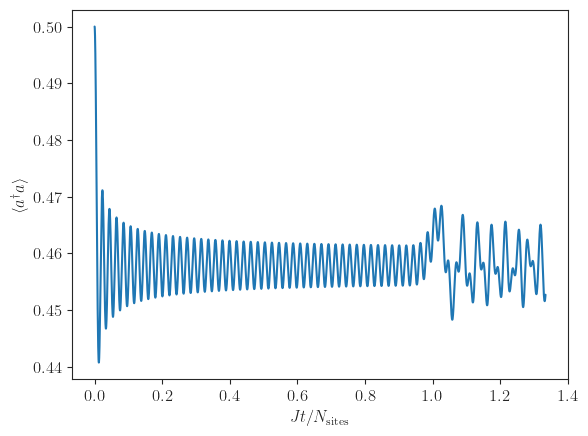

In [105]:

plt.plot(J*T/N_sites,Data.real)
plt.ylabel(r'$\langle a^{\dagger} a \rangle$')
plt.xlabel(r'$Jt/N_{\rm{sites}} $')

## Photonic Population distribution of cavity sites

The hamiltonian for the CCA was expressed in terms of it's $k-$space modes. The bosonic operators of the cavity sites in position or $x-$space can be expressed in terms of the $k-$space operators as $R_{x}=\sqrt{\frac{1}{N}}\sum_{k} R_{k}e^{-ikx}$. Therefore, the photonic population of the cavity site at postion $x$ is given by

$$\left\langle R_{x}^{\dagger}R_{x}\right\rangle =\frac{1}{N}\sum_{k,k'}\left\langle R_{k'}^{\dagger}R_{k}\right\rangle e^{i\left(k'-k\right)x}$$.

As the dipole in an excited state decays into the CCA, the emitted energy is distributed into the sites of the cavity. The time evolution of this distribution can be obtained as we can compute the evolution of the bath correlators in $k-$space given by $\left\langle R_{k'}^{\dagger}R_{k}\right\rangle$. This is done by using the function `qp.CCAPopulation(ωS,N_sites,ωC,J,h,Ad_A0,t_vals,leave_modes=10)`, where
- `ωS` is the list containing the frequencies of the system dipoles
-  ``N_sites`` refers to the number of cavity sites in the CCA.
-  ``ωC`` is the frequency of the cavity sites of the CCA
-  `J` is the hopping parameter of the CCA
- `h` is the hamilton matrix
- `Ad_A0` is the matrix of the initial correlators
- `t_vals` is the list containing the values of time at which the $\left\langle R_{x}^{\dagger}R_{x}\right\rangle(t)$ is to be calculated
- `leave_modes` is a parameter that determines how many modes will be excluded from the calculation for the site population distribution. Setting the value of the `leave_modes` parameter to zero gives us the most accurate values of the site populations, but it leads to larger time required for computation.

### Single Dipole

Here we consider the case of a dipole initially in a fock state with population one, coupled to a site of a CCA. The hamilton matrix and the matrix of initial correlators can be obtained using the `qp.CCAHamiltonian` and `qp.CCAInitCorr` functions. Using the generated `h` and `Ad_A0`, we can calculate the Photonic population distribution of the cavity sites using `qp.CCAPopulation`.

In [115]:
N_sites = 100
ωC = 2.5
J = 1.0
ωS = [2.5]
xS = [0]
g = 0.1/np.sqrt(N_sites)

h = qp.CCAHamiltonian(ωS,xS,ωC,J,N_sites,g,RWA_Switch=0,Broadband=0,gauge='d.E')

Ad_A0 = qp.CCAInitCorr(N_sites,ωC,J,'vacuum','fock',N_d=1,Beta=0.1)

In [118]:
t_vals = np.arange(0,50,1)

X_ax, P = qp.CCAPopulation(ωS,N_sites,ωC,J,h,Ad_A0,t_vals,leave_modes=10)

The obtained population distribution `P` is a 2d list and can be plotted as function of position and time using a contour plot 

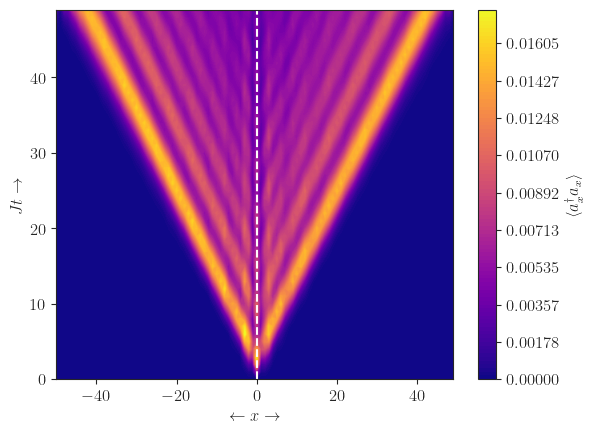

In [119]:
X, Y = np.meshgrid(X_ax, J*t_vals)

Z = (np.array(P)).real/N_sites

clev = np.arange(0,np.amax(Z),np.amax(Z)*0.01) #Adjust the .001 to get finer gradient

CS = plt.contourf(X, Y, Z, clev, cmap=plt.cm.plasma)
plt.colorbar(CS,  orientation='vertical', pad=0.05,label=r'$\langle a^{\dagger}_x a_x \rangle $')
plt.xlabel(r'$\leftarrow x \rightarrow$')
plt.ylabel(r'$ Jt \rightarrow$')
for i in range(len(ωS)):
    plt.axvline(xS[i],ls='--',color='snow')
